Let's use the parallel circuit again to look to see what happens when there is a bias current that is larger than the critical current. We will use a variation of the parallel circuit template anf change it such that a dc current is in parallel with the Josephson junction, instead of the original flux-tuned version.

In [1]:
from circuit_reader import *
cd = CircuitData()
cd.simulation_cycle("parallel", variation="current_bias")

/home/andrewyi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Using variation current_bias.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.07209973732630412 minutes.


Which looks like:

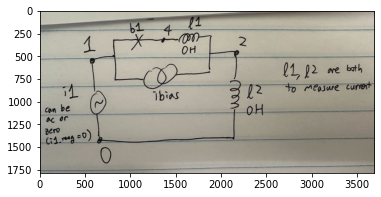

In [2]:
import matplotlib.image as mpimg  # this is just to show the circuit diagram. does not affect the rest of the code
img = mpimg.imread('examples/parallel_current_bias.jpg')
imgplot = plt.imshow(img)
plt.show()

I also added a template_text() function which prints the template's current format with variations included. This can be then exported to something like pywrspice if needed.
You don't need to simulate the whole thing, the fastest way is using read_template(template_name={template_name}, variation={variation_name}) then template_text().

In [3]:
print(cd.template_text())

Parallel circuit
.model {model} jj(level={level}, icrit={icrit_mag})
i1 0 1 ac sin({i1_phase} {i1_mag} {i1_freq})
b1 1 4 101 {model} ics={ics_mag} phi={phi_mag}
l1 4 2 {l1_mag}
l2 2 0 {l2_mag}
ibias 1 2 {ibias_mag}
.tran {tran_step} {tran_stop} {tran_start} uic 
.control 
set maxdata={maxdata}
run 
write {filename}.txt {measurables}
.endc 



Here's what things normally look like, when there is zero bias current:

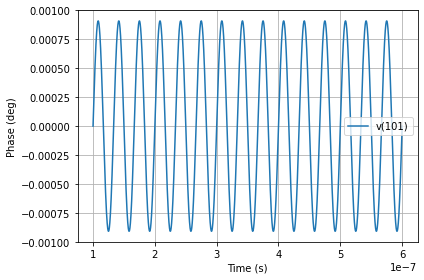

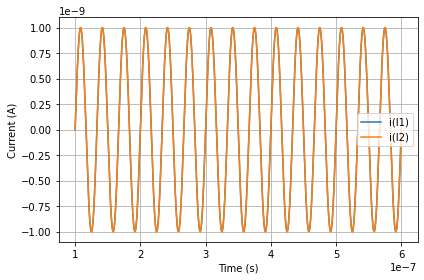

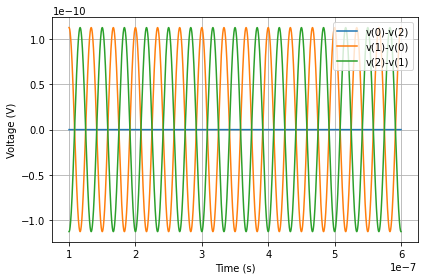

In [4]:
import circuit_plotter as cplt
cplt.plot_cd_measurables(cd)

Let's bias the current to something moderate, like 3e-9 A. Also, we will just look at a shorter time scale.

Using variation current_bias.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.016680729389190675 minutes.


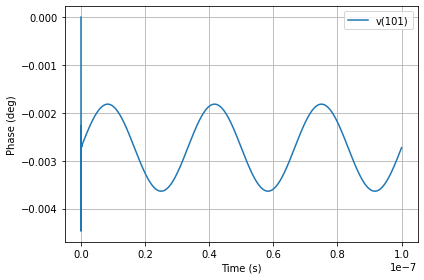

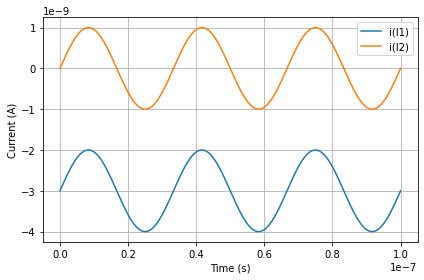

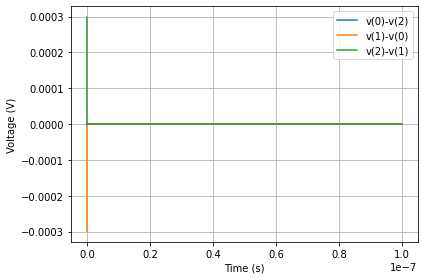

In [5]:
cd.change_param("tran_start", 0)
cd.change_param("tran_stop", 1e-7)
cd.change_param("tran_step", 1e-12)
cd.change_param("ibias_mag", 3e-9)
cd.simulation_cycle("parallel", variation="current_bias")
cplt.plot_cd_measurables(cd)

Now let's go over the critical current.

Using variation current_bias.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.08337965408960978 minutes.


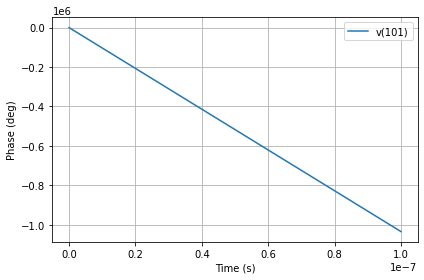

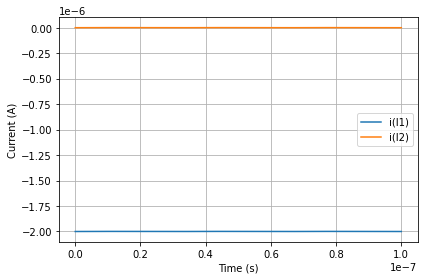

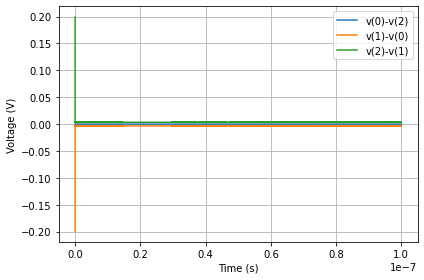

In [6]:
cd.change_param("ibias_mag", 2e-6)
cd.simulation_cycle("parallel", variation="current_bias")
cplt.plot_cd_measurables(cd)

Now we see some runoff behavior in the phase. The phase is "tumbling down" the washboard potential and will never stop since the washboard has tilted too much.

But where does the runoff begin? Well, it seems like that point is actually slightly smaller than the critical current (1.1e-06 A). Consider the comparison between two bias currents below:

Using variation current_bias.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.016460939248402914 minutes.


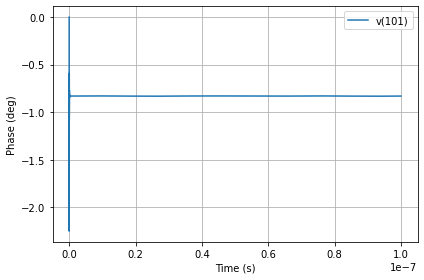

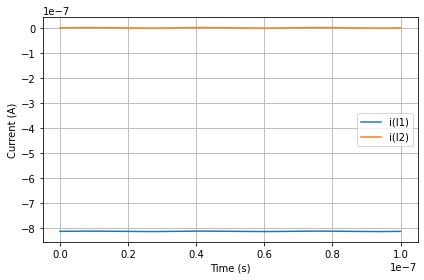

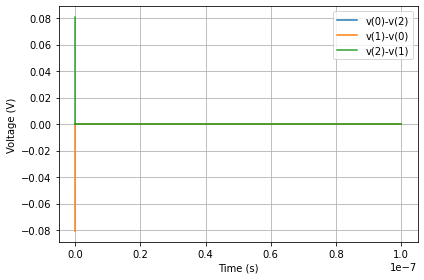

In [7]:
cd.change_param("ibias_mag", 0.812e-6)
cd.simulation_cycle("parallel", variation="current_bias")
cplt.plot_cd_measurables(cd)

Using variation current_bias.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.07939585447311401 minutes.


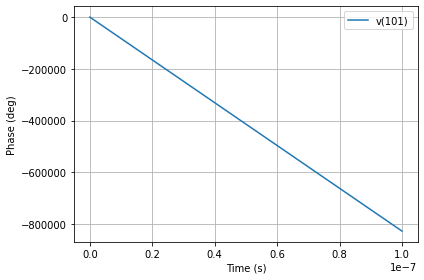

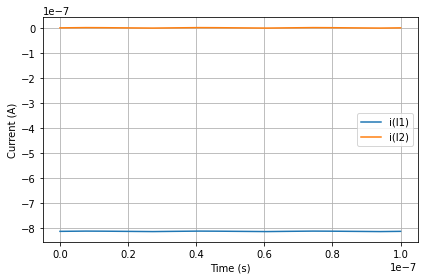

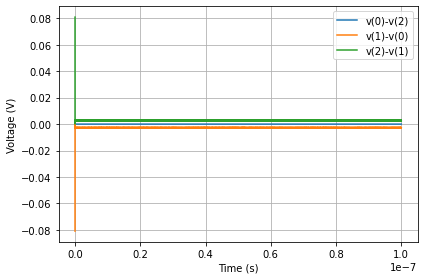

In [8]:
cd.change_param("ibias_mag", 0.813e-6)
cd.simulation_cycle("parallel", variation="current_bias")
cplt.plot_cd_measurables(cd)

This transition is slightly below the critical current, rather than being at exactly at it. I'm not exactly sure right now why this is the case. Still, we can see that the behavior is obviously different when the JJ is out of its superconducting phase. Note that this is still the same even if there is no ac current! We can check this by using an i1_mag of zero, while the ibias_mag is still 0.813e-6:

Using variation current_bias.
WRspice circuit simulation system, release 4.3.18, build 112023-164152
Copyright (C) Whiteley Research Inc, Sunnyvale CA  2023
All Rights Reserved


Circuit: Parallel circuit

WRSPICE simulation took 0.07369314829508464 minutes.


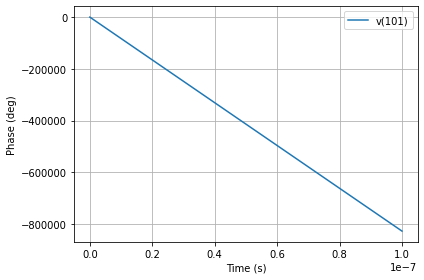

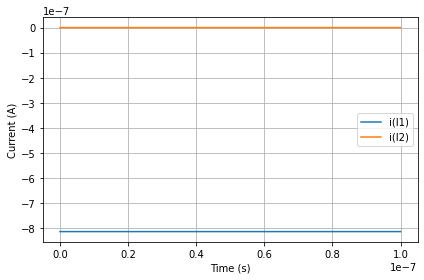

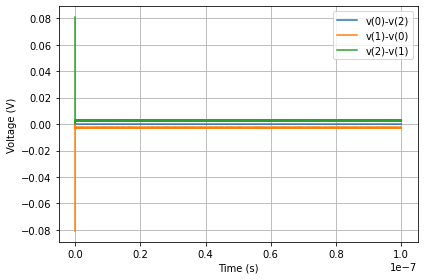

In [9]:
cd.change_param("i1_mag", 0)
cd.simulation_cycle("parallel", variation="current_bias")
cplt.plot_cd_measurables(cd)